# Exploratory Data Analysis (EDA)

---

## Retail scenario and learning goals

**Scenario:** You work for a small online shop and are exploring a sample of customer orders.  
You want to understand the data, check for issues, and communicate insights.

**You will learn to:**
1) Explain why EDA is essential and follow a simple EDA flow  
2) Recognise data types and common data sources  
3) Compute descriptive statistics: mean, median, mode, range, variance, standard deviation, IQR  
4) Produce summary tables with `DataFrame.describe()`  
5) Explore categorical data with frequency tables and cross-tabulations  
6) Detect and handle outliers with visuals and IQR rules, and do basic sensitivity checks  
7) Explore multivariate relationships with correlations, heatmaps, and pairplots

### Quick checklist to guide your EDA
1) Explore the data: shapes, types, missingness, ranges  
2) Identify patterns: distributions, outliers, simple relationships  
3) Form hypotheses: what might explain the patterns  
4) Communicate: concise visuals and summaries for your audience

In [1]:
# Setup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# For reproducibility
rng = np.random.default_rng(7)

# Create a small, illustrative dataset
n = 60
df = pd.DataFrame({
    "CustomerID": np.arange(1, n+1),
    "Age": rng.integers(18, 70, size=n),
    "OrderChannel": rng.choice(["Web", "Mobile", "Store"], size=n, p=[0.55, 0.30, 0.15]),
    "ItemsBought": rng.integers(1, 8, size=n),
    "OrderValue": np.round(rng.normal(80, 25, size=n), 1)  # £
})

# Add some missing values and outliers to reflect real-world issues
df.loc[rng.choice(df.index, 3, replace=False), "OrderValue"] = np.nan
df.loc[rng.choice(df.index, 2, replace=False), "OrderValue"] = [350.0, 420.0]  # very large orders (outliers)

df.head()


,CustomerID,Age,OrderChannel,ItemsBought,OrderValue
0,1,67,Web,5,84.8
1,2,50,Web,1,82.2
2,3,53,Web,7,65.2
3,4,64,Web,7,77.0
4,5,48,Mobile,4,30.1


## Reading data from a CSV file

In this tutorial, we first create synthetic data for practice.  
In a real project, your data would usually come from a CSV file.  
Below is an example of how you would read in a CSV file instead:

- **data.csv**: Replace this with the actual path to your CSV file.  
- **index_col=None**: Pandas will assign default row numbers instead of using a column as the index.  
- **na_values**: Defines which strings should be treated as missing values (optional).  
- **encoding='utf-8'**: Ensures correct reading of most CSV files (optional).  

Example code:

```python
df = pd.read_csv(
    "data.csv",        # Path to the CSV file
    index_col=None,     # No column as index
    na_values=["NA"],   # Treat 'NA' as missing value
    encoding="utf-8"    # File encoding
)


# 1. Why EDA matters

EDA is the first step: you examine, summarise, and visualise the data to understand its key characteristics, spot issues like missing values or outliers, and discover patterns that guide later analysis. It is iterative and helps you form and refine hypotheses. 

# 2. Data types and data sources (quick recap)

**Data types**
- Categorical: nominal (no order) and ordinal (natural order)
- Numerical: discrete (counted) and continuous (measured)

**Data sources**
- Databases
- Web APIs
- Flat files such as CSV, JSON, XML


In [2]:
# Peek at structure and basic issues
print(df.info())     # dtypes and missingness


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   CustomerID    60 non-null     int64  
 1   Age           60 non-null     int64  
 2   OrderChannel  60 non-null     object 
 3   ItemsBought   60 non-null     int64  
 4   OrderValue    57 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 2.5+ KB
None


In [3]:
display(df.sample(15))


,CustomerID,Age,OrderChannel,ItemsBought,OrderValue
39,40,69,Web,4,121.4
16,17,24,Web,6,116.0
32,33,44,Mobile,1,71.8
57,58,50,Web,3,113.4
47,48,20,Store,7,36.0
49,50,19,Web,1,79.4
13,14,18,Mobile,1,83.3
24,25,55,Web,6,60.2
43,44,26,Mobile,7,115.2
6,7,61,Web,6,89.1


# 3. Descriptive statistics

## 3.1 Central tendency
- **Mean**: arithmetic average  
- **Median**: middle value when sorted, less sensitive to outliers  
- **Mode**: most common value

## 3.2 Variability
- **Range**: max − min  
- **Variance**: average squared deviation from the mean  
- **Standard deviation**: square root of variance  
- **IQR**: Q3 − Q1, robust to outliers


In [4]:
# Descriptive statistics for a single numeric column
vals = df["OrderValue"].dropna()  # ignore NaNs for these stats

mean_val = vals.mean()
median_val = vals.median()
mode_vals = vals.mode()  # may return multiple modes

data_range = vals.max() - vals.min()
variance = vals.var(ddof=1)       # sample variance to match typical practice
std_dev = vals.std(ddof=1)
q1 = vals.quantile(0.25)
q3 = vals.quantile(0.75)
iqr = q3 - q1

In [5]:
print(f"Mean: {mean_val:.2f}")
print(f"Median: {median_val:.2f}")
print(f"Mode(s): {list(mode_vals.values)}")
print(f"Range: {data_range:.2f}")
print(f"Variance: {variance:.2f}")
print(f"Standard deviation: {std_dev:.2f}")
print(f"Q1: {q1:.2f}, Q3: {q3:.2f}, IQR: {iqr:.2f}")


Mean: 85.05
Median: 74.80
Mode(s): [np.float64(26.8), np.float64(30.1), np.float64(36.0), np.float64(36.3), np.float64(41.6), np.float64(43.6), np.float64(45.5), np.float64(48.1), np.float64(49.6), np.float64(51.7), np.float64(52.3), np.float64(53.6), np.float64(55.6), np.float64(58.9), np.float64(59.8), np.float64(60.2), np.float64(62.6), np.float64(63.2), np.float64(64.2), np.float64(64.3), np.float64(65.2), np.float64(66.0), np.float64(66.4), np.float64(67.3), np.float64(70.6), np.float64(71.8), np.float64(72.5), np.float64(73.2), np.float64(74.8), np.float64(76.0), np.float64(76.1), np.float64(77.0), np.float64(78.7), np.float64(79.4), np.float64(80.2), np.float64(80.3), np.float64(81.8), np.float64(82.2), np.float64(83.3), np.float64(84.8), np.float64(87.3), np.float64(89.1), np.float64(91.4), np.float64(98.4), np.float64(98.9), np.float64(99.5), np.float64(101.2), np.float64(104.1), np.float64(107.5), np.float64(111.2), np.float64(111.4), np.float64(113.4), np.float64(115.2), np.

# 4. Statistical summaries with Pandas

`DataFrame.describe()` gives a quick statistical summary for numerical columns by default. You can also include object columns by passing `include="all"`. 


In [6]:
summary_stats = df.describe()
summary_stats

,CustomerID,Age,ItemsBought,OrderValue
count,60.000000,60.000000,60.000000,57.000000
mean,30.500000,45.966667,4.333333,85.045614
std,17.464249,15.070419,2.055721,62.523801
min,1.000000,18.000000,1.000000,26.800000
25%,15.750000,33.000000,3.000000,59.800000
50%,30.500000,45.000000,4.500000,74.800000
75%,45.250000,60.000000,6.000000,91.400000
max,60.000000,69.000000,7.000000,420.000000


# 5. Exploring categorical data

## 5.1 Frequency tables
Count how many times each category appears.

## 5.2 Cross-tabulations
Contingency tables show relationships between two categorical variables. They are useful for comparing distributions across groups. 


In [7]:
# 5.1 Frequency table
freq_channel = pd.crosstab(index=df["OrderChannel"], columns="count")
freq_channel


col_0,count
OrderChannel,
Mobile,18
Store,9
Web,33


# 6. Identifying outliers

Outliers are values that deviate strongly from most observations. They can distort means and standard deviations and can affect models. You can spot univariate outliers with box plots and use scatter plots for multivariate contexts. 


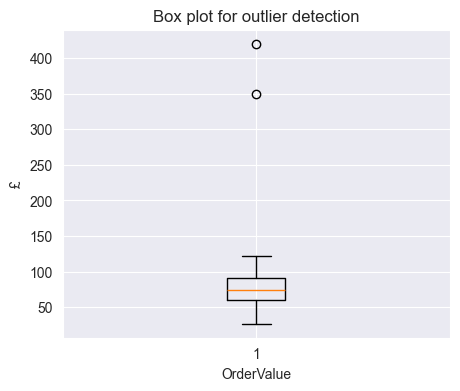

In [8]:
# 6.1 Univariate outliers: box plot of OrderValue
plt.figure(figsize=(5, 4))
plt.boxplot(df["OrderValue"].dropna())
plt.xlabel("OrderValue")
plt.ylabel("£")
plt.title("Box plot for outlier detection")
plt.show()


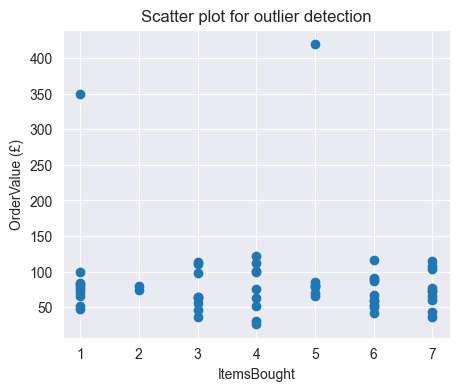

In [9]:
# 6.2 Multivariate view: ItemsBought vs OrderValue
plt.figure(figsize=(5, 4))
plt.scatter(df["ItemsBought"], df["OrderValue"])
plt.xlabel("ItemsBought")
plt.ylabel("OrderValue (£)")
plt.title("Scatter plot for outlier detection")
plt.show()


# 7. Programmatic detection of outliers

A simple rule is the IQR method for univariate outliers. Values below Q1 − 1.5×IQR or above Q3 + 1.5×IQR are flagged as outliers. 


### Detecting outliers using the IQR method

This code identifies outliers in the `OrderValue` column using the Interquartile Range (IQR) approach:

1. **Drop missing values**  
   `vals = df["OrderValue"].dropna()`  
   Removes any `NaN` values so calculations are not affected.

2. **Compute Q1 and Q3**  
   - `q1 = vals.quantile(0.25)` → the 25th percentile (lower quartile)  
   - `q3 = vals.quantile(0.75)` → the 75th percentile (upper quartile)  

3. **Calculate the IQR**  
   `iqr = q3 - q1`  
   This measures the spread of the middle 50% of the data.

4. **Determine outlier boundaries**  
   - Lower bound = `Q1 − 1.5 × IQR`  
   - Upper bound = `Q3 + 1.5 × IQR`  
   Values outside these limits are considered potential outliers.

5. **Create a mask for outliers**  
   `outlier_mask = (df["OrderValue"] < lower) | (df["OrderValue"] > upper)`  
   This gives `True` for rows with outlier values.

6. **Subset the data**  
   - `outliers` → only rows flagged as outliers  
   - `filtered` → rows without outliers  

7. **Display results**  
   Shows the detected outliers and the first few rows of the filtered dataset.


In [10]:
# Remove missing values from the OrderValue column
vals = df["OrderValue"].dropna()

# Calculate the 25th and 75th percentiles
q1 = vals.quantile(0.25)   # Lower quartile (Q1)
q3 = vals.quantile(0.75)   # Upper quartile (Q3)

# Compute the Interquartile Range (IQR)
iqr = q3 - q1

# Determine lower and upper bounds for outliers
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Identify rows where OrderValue is below or above the bounds
outlier_mask = (df["OrderValue"] < lower) | (df["OrderValue"] > upper)

# Extract outliers and non-outlier (filtered) data
outliers = df.loc[outlier_mask, ["CustomerID", "ItemsBought", "OrderValue"]]
filtered = df.loc[~outlier_mask, ["CustomerID", "ItemsBought", "OrderValue"]]

# Display the outliers and the first few rows of filtered data
print("Outliers:")
display(outliers)
print("Filtered data (head):")
display(filtered.head())

Outliers:


,CustomerID,ItemsBought,OrderValue
17,18,1,350.0
54,55,5,420.0


Filtered data (head):


,CustomerID,ItemsBought,OrderValue
0,1,5,84.8
1,2,1,82.2
2,3,7,65.2
3,4,7,77.0
4,5,4,30.1


# 8. Handling outliers and sensitivity analysis

Options include:
- Investigate data quality
- Keep them if they are meaningful business cases
- Apply robust statistics or transform the data
- Remove them with a transparent rule and compare results

A simple sensitivity check is to repeat a summary or a plot with and without outliers and see how conclusions change. 


In [11]:
# Sensitivity example: mean and median with and without outliers
with_outliers = df["OrderValue"].dropna()
without_outliers = df.loc[~outlier_mask, "OrderValue"].dropna()

print("With outliers  -> mean:", round(with_outliers.mean(), 2), " median:", round(with_outliers.median(), 2))
print("Without outliers -> mean:", round(without_outliers.mean(), 2), " median:", round(without_outliers.median(), 2))


With outliers  -> mean: 85.05  median: 74.8
Without outliers -> mean: 74.14  median: 73.2


# 9. Multivariate analysis: correlation basics

Two common correlation measures:
- **Pearson**: linear relationships, range −1 to 1  
- **Spearman**: monotonic relationships, less sensitive to outliers

Correlation helps quantify associations across numeric variables. 


In [12]:
# Create a small numeric frame
num = df[["Age", "ItemsBought", "OrderValue"]].copy()

pearson = num.corr(method="pearson")
spearman = num.corr(method="spearman")

print("Pearson correlation:")
display(pearson)
print("Spearman correlation:")
display(spearman)


Pearson correlation:


,Age,ItemsBought,OrderValue
Age,1.000000,-0.029725,0.144106
ItemsBought,-0.029725,1.000000,-0.083319
OrderValue,0.144106,-0.083319,1.000000


Spearman correlation:


,Age,ItemsBought,OrderValue
Age,1.000000,-0.027858,-0.004832
ItemsBought,-0.027858,1.000000,-0.035033
OrderValue,-0.004832,-0.035033,1.000000


# 10. Visual correlation summaries

Heatmaps give a quick visual summary of a correlation matrix. Pairplots show pairwise scatter plots and distributions, useful for quickly scanning relationships. 


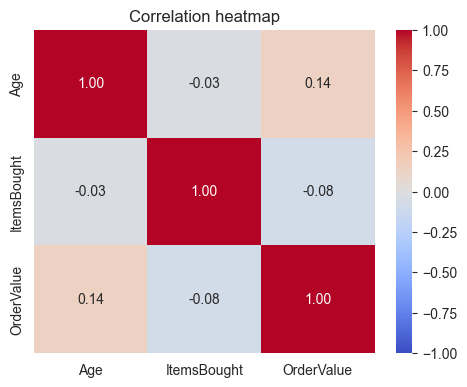

In [13]:
# Heatmap

# Compute the correlation matrix for numeric columns
corr = num.corr()

# Set figure size for the plot
plt.figure(figsize=(5.5, 4.2))

# Draw heatmap with a fixed colour scale from -1 to 1
sns.heatmap(
    corr,
    annot=True,       # show correlation values
    cmap="coolwarm",  # blue for negative, red for positive
    fmt=".2f",        # format numbers with 2 decimals
    vmin=-1, vmax=1   # fix scale from -1 to 1
)

# Add a title to the heatmap
plt.title("Correlation heatmap")

# Display the plot
plt.show()



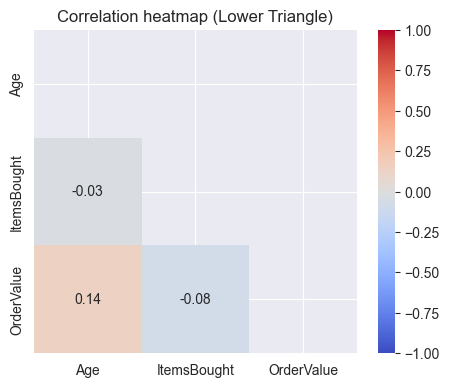

In [14]:
# Compute correlation matrix
corr = num.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Plot only the lower triangle
plt.figure(figsize=(5.5, 4.2))
sns.heatmap(
    corr,
    mask=mask,            # hide upper triangle
    annot=True,           # display correlation values
    cmap="coolwarm",      # blue for negative, red for positive
    fmt=".2f",            # 2 decimal places
    square=True,          # keep cells square
    vmin=-1, vmax=1      # fix colour scale from -1 to 1
)

plt.title("Correlation heatmap (Lower Triangle)")
plt.show()


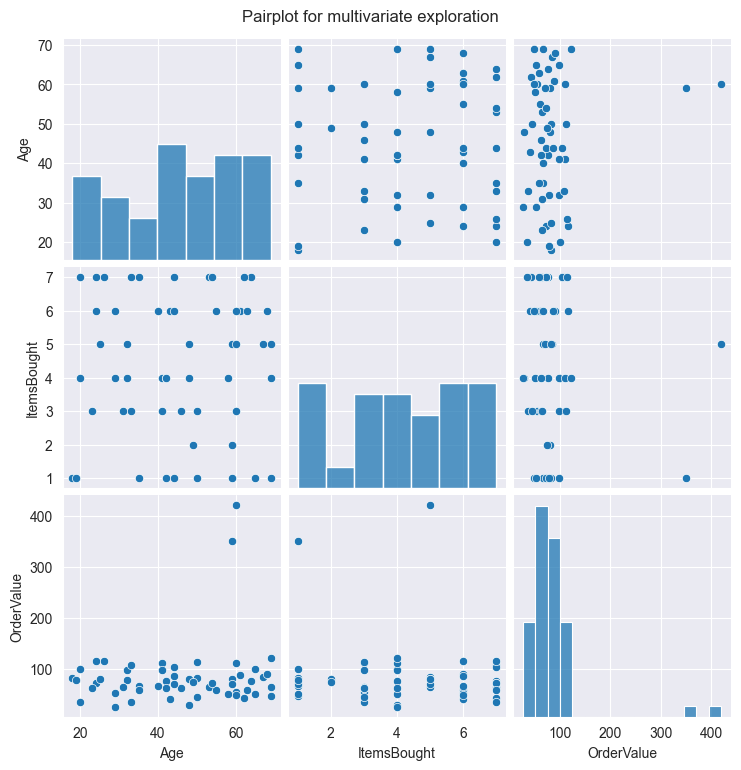

In [15]:
# Pairplot
sns.pairplot(num.dropna(), diag_kind="hist")
plt.suptitle("Pairplot for multivariate exploration", y=1.02)
plt.show()


# 11. Communicating findings

The final step is to communicate insights. Summarise the questions you answered, key patterns, any data quality issues, the effect of outliers, and high-level relationships. Use clear visuals, plain language, and short tables. 

## Summary of Findings

### Questions answered  
- What types of data do we have, and are there missing values or outliers?  
- What are the key descriptive statistics for each numeric variable?  
- How are categorical variables distributed, and how do they relate to each other?  
- How do variables relate to one another numerically (correlation)?  

### Key patterns  
- **OrderChannel:** Most orders came from the Web, followed by Mobile, then Store.  
- **Age:** Customers were spread across all age groups, with slightly more in the 31–45 group.  
- **OrderValue:** Most orders were between £50–£120, with a few much higher values.  

### Data quality issues  
- Some missing values in `OrderValue`.  
- A few extremely high orders flagged as potential outliers.  

### Effect of outliers  
- Outliers inflated the mean order value but had less impact on the median.  
- Removing outliers made the average order value more representative of typical customers.  

### High-level relationships  
- Positive correlation between `ItemsBought` and `OrderValue`: customers buying more items usually spent more.  
- Age had weak correlations with other variables, suggesting spending patterns were not strongly age-dependent.  

### Recommendations  
- Consider removing or separately analysing extreme orders.  
- Use the median for central tendency when data contain outliers.  
- Explore further segmentation by channel or basket size for business insights.

# What you have learned
- Why EDA is the foundation of any analysis  
- The main data types and common sources  
- Descriptive statistics: central tendency, variability, IQR  
- Rapid statistical summaries with `describe()`  
- Categorical exploration with frequency tables and cross-tabs  
- Outlier detection with visuals and the IQR rule, plus sensitivity checks  
- Multivariate analysis with Pearson and Spearman correlations, heatmaps, and pairplots
